**6. algoritmos de agrupamiento - clustering**






**En que Consiste el Algoritmo:**
Mean Shift un enfoque sólido hacia el análisis del espacio de características
Su enfoque es basado en la densidad que desplaza iterativamente el centro de un grupo hacia la región más densa de puntos de datos es como agrupasiones en clústeres.

**Explicación de resultados:** 
Como se pude apreciar el algoritmo  Mean Shift hace su desplazamiento en 3 clústeres  aplicando el agrupamiento de cambio medio tiene como objetivo descubrir manchas en una densidad uniforme de las muestras por eso podemos apreciar en las imagenes de color cierto pixeles en blanco.


**DataSet:**  sklearn.datasets.make_blobs





In [8]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [9]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [10]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


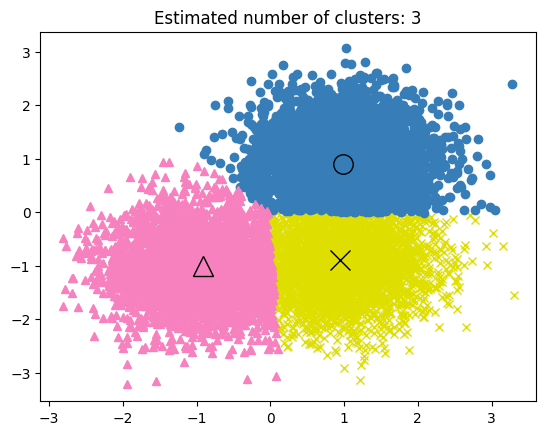

In [11]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()
